In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

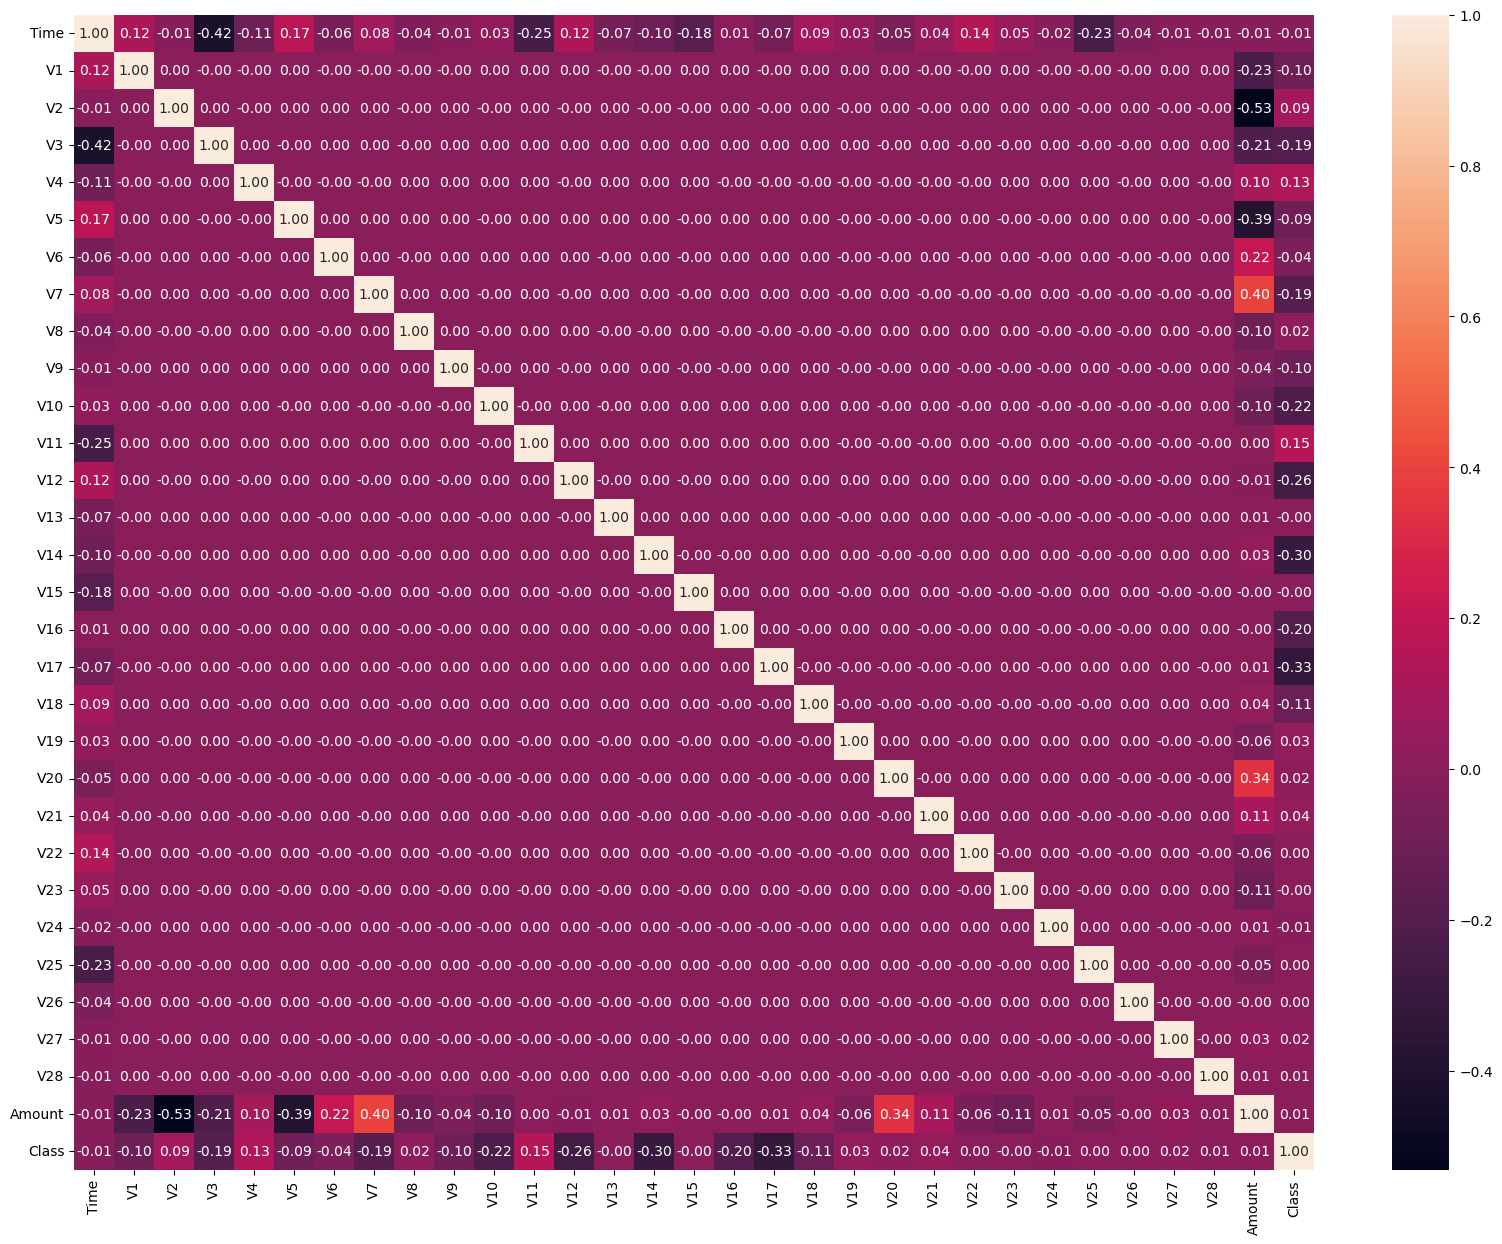

In [6]:
plt.figure(figsize=(20, 15))  # Adjust the size as needed
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [7]:
df.corr()["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
regression = LogisticRegression(max_iter=1000)

In [13]:
regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
predictions = regression.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc

In [16]:
print(accuracy_score(y_test, predictions))

0.9990743400683073


In [17]:
print(confusion_matrix(y_test, predictions))

[[93805    20]
 [   67    95]]


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.83      0.59      0.69       162

    accuracy                           1.00     93987
   macro avg       0.91      0.79      0.84     93987
weighted avg       1.00      1.00      1.00     93987



In [19]:
print(roc_auc_score(y_test, predictions))

0.7931032951416643


In [20]:
y_scores = regression.predict_proba(X_test)[:, 1]

In [21]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)

In [22]:
auprc = auc(recall, precision)

In [23]:
auprc

0.6181465124874288

**RESAMPLING**

In [24]:
legit_df = df[df["Class"]==0]
fraud_df = df[df["Class"]==1]

In [25]:
print(legit_df["Class"].value_counts())
print(fraud_df["Class"].value_counts())

Class
0    284315
Name: count, dtype: int64
Class
1    492
Name: count, dtype: int64


In [26]:
legit_df = legit_df.sample(n = 492)

In [27]:
legit_df.shape

(492, 31)

In [28]:
resampled_df = pd.concat([fraud_df, legit_df], axis=0)

In [29]:
resampled_df.shape

(984, 31)

In [30]:
X_resampled = resampled_df.drop("Class", axis = 1)
y_resampled = resampled_df["Class"]

In [31]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42,stratify=y_resampled)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
regression_r = LogisticRegression(max_iter=1000)

In [34]:
regression_r.fit(X_train_r, y_train_r)

LogisticRegression(max_iter=1000)

In [35]:
predictions_r = regression_r.predict(X_test_r)

In [36]:
print(accuracy_score(y_test_r, predictions_r))

0.9569230769230769


In [37]:
print(confusion_matrix(y_test_r, predictions_r))

[[158   5]
 [  9 153]]


In [38]:
print(classification_report(y_test_r, predictions_r))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       163
           1       0.97      0.94      0.96       162

    accuracy                           0.96       325
   macro avg       0.96      0.96      0.96       325
weighted avg       0.96      0.96      0.96       325



In [39]:
print(roc_auc_score(y_test_r, predictions_r))

0.9568847989093388


In [40]:
y_scores_r = regression_r.predict_proba(X_test_r)[:, 1]

In [41]:
precision_r, recall_r, _ = precision_recall_curve(y_test_r, y_scores_r)

In [42]:
auprc = auc(recall_r, precision_r)

In [43]:
auprc

0.9885085821704093

In [44]:
print(accuracy_score(y_test, regression_r.predict(X_test)))

0.9547384212710268
